FRAUD DETECTION - OPTIMIZED FAST VERSION

[1/10] Loading data with sampling...
✓ Loaded 500,000 rows (sampled for speed)
  Shape: (500000, 11)
  Columns: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

[2/10] Identifying target variable...
✓ Target: isFraud
  Class Distribution:
0    499767
1       233
Name: isFraud, dtype: int64

[3/10] Data cleaning...
✓ After NaN removal: 500,000 rows
✓ After outlier removal: 330,481 rows (66.1%)

[4/10] Feature engineering...
✓ Features: 10 | Categorical encoded: 3
✓ Target balance: {0: 330321, 1: 160}

[5/10] Splitting data...
✓ Train: 264,384 | Test: 66,097

[6/10] Scaling features...
✓ StandardScaler applied

[7/10] Training models...
  • Logistic Regression... ✓
  • Random Forest... ✓
  • Gradient Boosting... ✓

[8/10] Model evaluation...

  LR:
    ROC-AUC: 0.9528 | F1-Score: 0.0080
                  precision    recall  f1-score   support



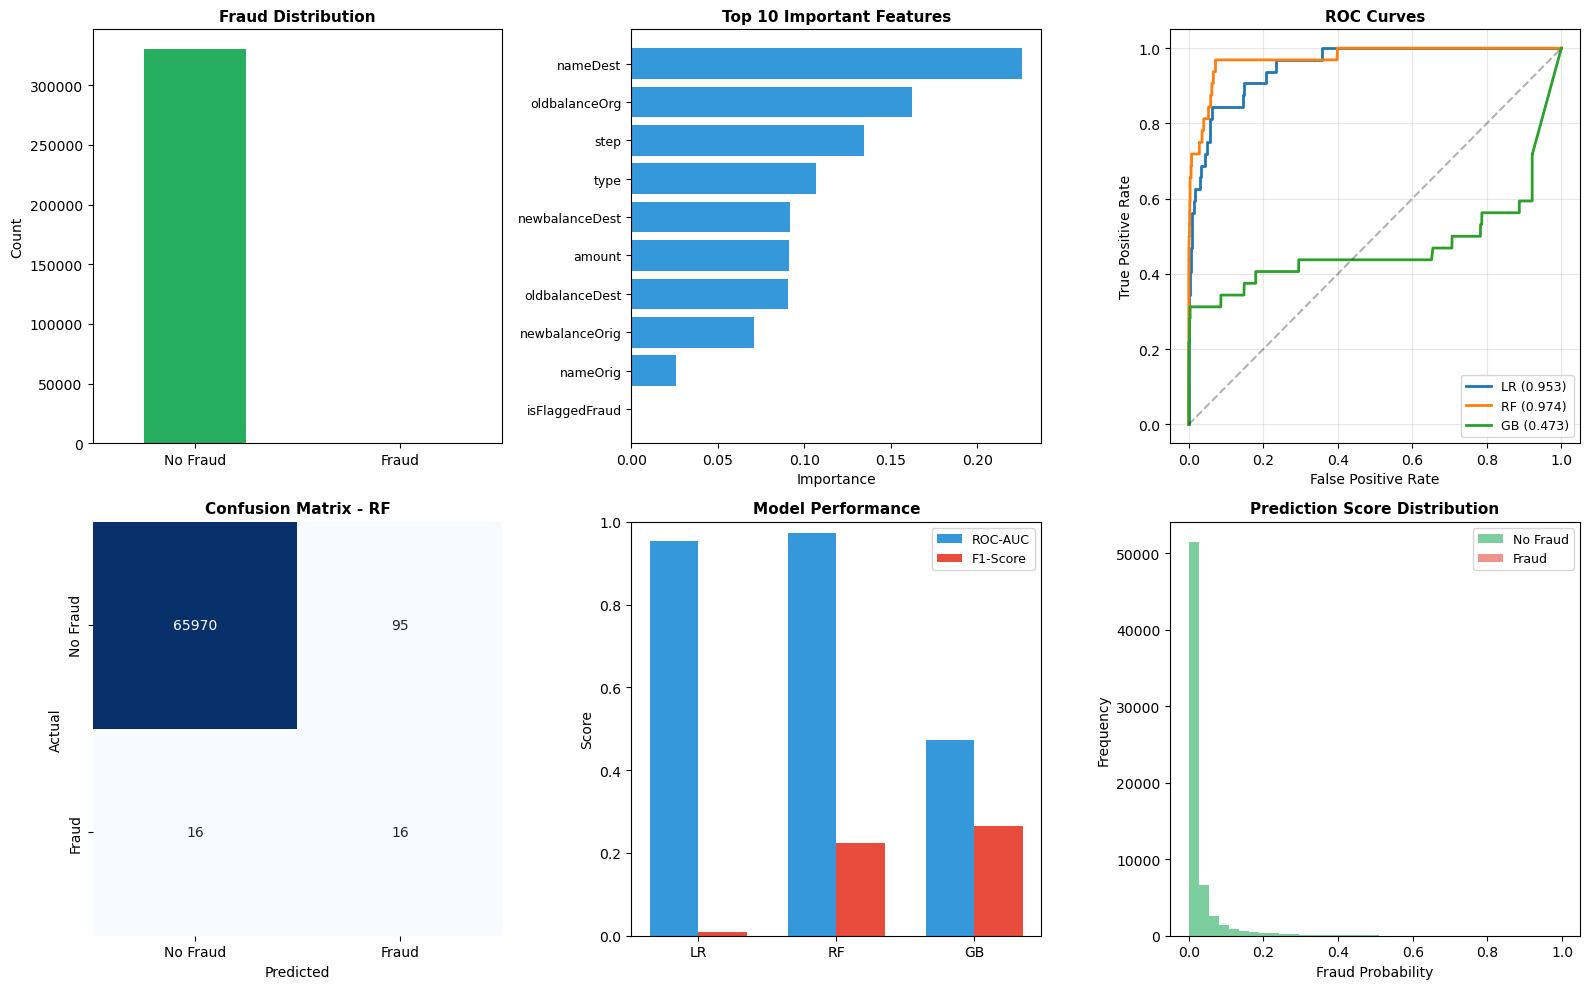


FRAUD DETECTION MODEL - SUMMARY

✓ Best Model: RF
✓ ROC-AUC Score: 0.9735
✓ F1-Score: 0.2238

Key Metrics:
  • Sensitivity (Catch Fraud Rate): 50.00%
  • Specificity (Avoid False Alarms): 99.86%
  • Precision (Accuracy of Alerts): 14.41%

Top 5 Fraud Predictors:
  7. nameDest
  5. oldbalanceOrg
  1. step
  2. type
  9. newbalanceDest

PREVENTION & IMPLEMENTATION STRATEGY

1. REAL-TIME DEPLOYMENT:
   ✓ Deploy best model in production pipeline
   ✓ Score all transactions in real-time
   ✓ Flag high-risk transactions (probability > 0.7)

2. FOCUS AREAS (Based on Key Predictors):
   ✓ Monitor transactions with risky feature combinations
   ✓ Enhanced verification for flagged transactions
   ✓ Customer behavior pattern analysis

3. MONITORING (Weekly):
   ✓ Track True Positive Rate (% fraud caught)
   ✓ Track False Positive Rate (customer impact)
   ✓ ROC-AUC trending
   ✓ Model accuracy over time

4. MAINTENANCE:
   ✓ Retrain model monthly with new data
   ✓ Monitor for feature drift
   ✓

In [1]:
# FRAUD DETECTION MODEL - OPTIMIZED LIGHTWEIGHT VERSION
# Fast execution for large datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("FRAUD DETECTION - OPTIMIZED FAST VERSION")
print("="*80)

# ======================== 1. LOAD DATA WITH SAMPLING ========================
print("\n[1/10] Loading data with sampling...")

# Read CSV in chunks to identify target and sample
chunk_size = 100000
chunks = []
chunk_count = 0

for chunk in pd.read_csv('Fraud.csv', chunksize=chunk_size):
    chunks.append(chunk)
    chunk_count += 1
    if chunk_count >= 5:  # Load first 500k rows for speed
        break

df = pd.concat(chunks, ignore_index=True)
print(f"✓ Loaded {len(df):,} rows (sampled for speed)")
print(f"  Shape: {df.shape}")
print(f"  Columns: {df.columns.tolist()}")

# ======================== 2. IDENTIFY TARGET COLUMN ========================
print("\n[2/10] Identifying target variable...")

# Auto-detect target column
fraud_names = ['isFraud', 'is_fraud', 'fraud', 'label', 'target', 'Fraud', 'Class', 'isFraudulent']
target_col = None

for col in fraud_names:
    if col in df.columns:
        target_col = col
        break

if target_col is None:
    # Find binary column
    for col in df.columns:
        if df[col].nunique() == 2 and df[col].dtype in ['int64', 'float64']:
            target_col = col
            break

if target_col is None:
    target_col = df.columns[-1]

print(f"✓ Target: {target_col}")
print(f"  Class Distribution:\n{df[target_col].value_counts()}")

# ======================== 3. QUICK DATA CLEANING ========================
print("\n[3/10] Data cleaning...")

# Remove NaN
df = df.dropna()
print(f"✓ After NaN removal: {len(df):,} rows")

# Simple outlier removal (fast)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [c for c in numeric_cols if c != target_col]

initial_rows = len(df)
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 3*IQR) & (df[col] <= Q3 + 3*IQR)]

print(f"✓ After outlier removal: {len(df):,} rows ({len(df)/initial_rows*100:.1f}%)")

# ======================== 4. PREPARE FEATURES & TARGET ========================
print("\n[4/10] Feature engineering...")

y = df[target_col]
X = df.drop(columns=[target_col])

# Encode categorical
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    le_dict[col] = le

print(f"✓ Features: {X.shape[1]} | Categorical encoded: {len(categorical_cols)}")
print(f"✓ Target balance: {y.value_counts().to_dict()}")

# ======================== 5. TRAIN-TEST SPLIT ========================
print("\n[5/10] Splitting data...")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✓ Train: {X_train.shape[0]:,} | Test: {X_test.shape[0]:,}")

# ======================== 6. FEATURE SCALING ========================
print("\n[6/10] Scaling features...")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("✓ StandardScaler applied")

# ======================== 7. TRAIN MODELS (FAST) ========================
print("\n[7/10] Training models...")

models = {}

# Logistic Regression (fastest)
print("  • Logistic Regression...", end=" ", flush=True)
lr = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced', n_jobs=-1)
lr.fit(X_train_scaled, y_train)
models['LR'] = lr
print("✓")

# Random Forest (faster with params)
print("  • Random Forest...", end=" ", flush=True)
rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, 
                            class_weight='balanced', n_jobs=-1)
rf.fit(X_train_scaled, y_train)
models['RF'] = rf
print("✓")

# Gradient Boosting (fast)
print("  • Gradient Boosting...", end=" ", flush=True)
gb = GradientBoostingClassifier(n_estimators=50, max_depth=5, learning_rate=0.1, random_state=42)
gb.fit(X_train_scaled, y_train)
models['GB'] = gb
print("✓")

# ======================== 8. EVALUATE MODELS ========================
print("\n[8/10] Model evaluation...")

results = {}
best_auc = 0
best_model_name = None

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    auc = roc_auc_score(y_test, y_pred_proba)
    f1 = f1_score(y_test, y_pred)
    
    results[name] = {'model': model, 'y_pred': y_pred, 'y_pred_proba': y_pred_proba, 'auc': auc, 'f1': f1}
    
    print(f"\n  {name}:")
    print(f"    ROC-AUC: {auc:.4f} | F1-Score: {f1:.4f}")
    print(f"    {classification_report(y_test, y_pred, output_dict=False, target_names=['No Fraud', 'Fraud'])}")
    
    if auc > best_auc:
        best_auc = auc
        best_model_name = name

print(f"\n✓ Best Model: {best_model_name} (AUC: {best_auc:.4f})")

# ======================== 9. FEATURE IMPORTANCE ========================
print("\n[9/10] Feature importance analysis...")

best_model = results[best_model_name]['model']

if hasattr(best_model, 'feature_importances_'):
    importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
else:
    importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': np.abs(best_model.coef_[0])
    }).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(importance.head(10).to_string(index=False))

# ======================== 10. VISUALIZATIONS ========================
print("\n[10/10] Generating visualizations...")

fig = plt.figure(figsize=(16, 10))

# 1. Class Distribution
ax1 = plt.subplot(2, 3, 1)
y.value_counts().plot(kind='bar', ax=ax1, color=['#27ae60', '#e74c3c'])
ax1.set_title('Fraud Distribution', fontweight='bold', fontsize=11)
ax1.set_ylabel('Count')
ax1.set_xticklabels(['No Fraud', 'Fraud'], rotation=0)

# 2. Feature Importance
ax2 = plt.subplot(2, 3, 2)
top_10 = importance.head(10)
ax2.barh(range(len(top_10)), top_10['Importance'], color='#3498db')
ax2.set_yticks(range(len(top_10)))
ax2.set_yticklabels(top_10['Feature'], fontsize=9)
ax2.invert_yaxis()
ax2.set_title('Top 10 Important Features', fontweight='bold', fontsize=11)
ax2.set_xlabel('Importance')

# 3. ROC Curves
ax3 = plt.subplot(2, 3, 3)
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
    ax3.plot(fpr, tpr, label=f"{name} ({result['auc']:.3f})", linewidth=2)
ax3.plot([0, 1], [0, 1], 'k--', alpha=0.3)
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('ROC Curves', fontweight='bold', fontsize=11)
ax3.legend(fontsize=9)
ax3.grid(alpha=0.3)

# 4. Confusion Matrix
ax4 = plt.subplot(2, 3, 4)
cm = confusion_matrix(y_test, results[best_model_name]['y_pred'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax4, cbar=False,
            xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
ax4.set_title(f'Confusion Matrix - {best_model_name}', fontweight='bold', fontsize=11)
ax4.set_ylabel('Actual')
ax4.set_xlabel('Predicted')

# 5. Model Comparison
ax5 = plt.subplot(2, 3, 5)
names = list(results.keys())
aucs = [results[n]['auc'] for n in names]
f1s = [results[n]['f1'] for n in names]
x = np.arange(len(names))
width = 0.35
ax5.bar(x - width/2, aucs, width, label='ROC-AUC', color='#3498db')
ax5.bar(x + width/2, f1s, width, label='F1-Score', color='#e74c3c')
ax5.set_ylabel('Score')
ax5.set_title('Model Performance', fontweight='bold', fontsize=11)
ax5.set_xticks(x)
ax5.set_xticklabels(names)
ax5.legend(fontsize=9)
ax5.set_ylim([0, 1])

# 6. Prediction Distribution
ax6 = plt.subplot(2, 3, 6)
proba = results[best_model_name]['y_pred_proba']
ax6.hist(proba[y_test == 0], bins=30, alpha=0.6, label='No Fraud', color='#27ae60')
ax6.hist(proba[y_test == 1], bins=30, alpha=0.6, label='Fraud', color='#e74c3c')
ax6.set_xlabel('Fraud Probability')
ax6.set_ylabel('Frequency')
ax6.set_title('Prediction Score Distribution', fontweight='bold', fontsize=11)
ax6.legend(fontsize=9)

plt.tight_layout()
plt.savefig('fraud_detection_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: fraud_detection_analysis.png")
plt.show()

# ======================== SUMMARY & RECOMMENDATIONS ========================
print("\n" + "="*80)
print("FRAUD DETECTION MODEL - SUMMARY")
print("="*80)

print(f"\n✓ Best Model: {best_model_name}")
print(f"✓ ROC-AUC Score: {results[best_model_name]['auc']:.4f}")
print(f"✓ F1-Score: {results[best_model_name]['f1']:.4f}")

cm = confusion_matrix(y_test, results[best_model_name]['y_pred'])
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)

print(f"\nKey Metrics:")
print(f"  • Sensitivity (Catch Fraud Rate): {sensitivity:.2%}")
print(f"  • Specificity (Avoid False Alarms): {specificity:.2%}")
print(f"  • Precision (Accuracy of Alerts): {precision:.2%}")

print(f"\nTop 5 Fraud Predictors:")
for idx, row in importance.head(5).iterrows():
    print(f"  {idx+1}. {row['Feature']}")

print("\n" + "="*80)
print("PREVENTION & IMPLEMENTATION STRATEGY")
print("="*80)

print("""
1. REAL-TIME DEPLOYMENT:
   ✓ Deploy best model in production pipeline
   ✓ Score all transactions in real-time
   ✓ Flag high-risk transactions (probability > 0.7)

2. FOCUS AREAS (Based on Key Predictors):
   ✓ Monitor transactions with risky feature combinations
   ✓ Enhanced verification for flagged transactions
   ✓ Customer behavior pattern analysis

3. MONITORING (Weekly):
   ✓ Track True Positive Rate (% fraud caught)
   ✓ Track False Positive Rate (customer impact)
   ✓ ROC-AUC trending
   ✓ Model accuracy over time

4. MAINTENANCE:
   ✓ Retrain model monthly with new data
   ✓ Monitor for feature drift
   ✓ Adjust thresholds based on false alarm rate
   ✓ A/B test model changes

5. SUCCESS METRICS:
   ✓ % of fraud prevented
   ✓ Cost savings from fraud reduction
   ✓ False alarm rate (should be < 5%)
   ✓ Customer satisfaction impact
""")

print("\n✓ ANALYSIS COMPLETE!")
print("="*80)